In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import psutil
import os

sys.path.append("./scripts/")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import muon as mu
mu.set_options(display_style = "html", display_html_expand = 0b000);

In [3]:
%load_ext autoreload
%autoreload 2
from utils.interoperability import adata_to_mtx

# Load Data

In [4]:
file_path = "../data/qc_data/121c_dblt_rm.h5mu"
mdata = mu.read_h5mu(file_path)
mdata

/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


adt:Cell_Type_Experimental,category,"Monocyte_classical,Monocyte_classical,Natural_kill..."
adt:Sample_Tag,category,"SampleTag12_hs,SampleTag07_hs,SampleTag03_hs,Sampl..."
adt:Sample_Name,category,"SampleTag12_hs,SampleTag07_hs,SampleTag03_hs,Sampl..."
adt:SampleTag01_hs_Read_Count,int64,"3,11,1,9,128,1,5,13,6,11,7,47,5,0,66,10,34,9,16,5,..."
adt:SampleTag02_hs_Read_Count,int64,"18,30,8,22,27,40,30,103,15,17,1,16,9,14,22,6,13,6,..."
adt:SampleTag03_hs_Read_Count,int64,"10,20,49,25,7286,23,19,24,10,29,12,39,4,2,6,1,18,6..."
adt:SampleTag04_hs_Read_Count,int64,"31,49,6,58,39,36,63,60,81,18,37,24,29,6,65,23,7,27..."
adt:SampleTag05_hs_Read_Count,int64,"3,13,5,1,17,0,20,25,3,10,5,2,18,16,43,11,1,3,41,2,..."
adt:SampleTag06_hs_Read_Count,int64,"60,25,11,29,18,19,23,20,31,42,10,28,19,442,16,4,12..."
adt:SampleTag07_hs_Read_Count,int64,"65,250,23,34,17,12,166,42,44,19,36,34,13,5,50,398,..."
adt:SampleTag08_hs_Read_Count,int64,"8,16,12,40,130,26,13,241,8,24,111,7,19,15,15482,2,..."


In [5]:
data_path = "../data/"
if "tmp" not in os.listdir(data_path):
    tmp_path =  os.path.join(data_path, "tmp")
    os.mkdir(tmp_path)
adata_to_mtx(mdata["gex"], dir_path="../data/")

File saved to ../data/


In [6]:
#TODO: I need to explain how this works

In [7]:
binomial_dev = pd.read_csv("../data/tmp/binomial.dev.csv", index_col=0)
binomial_dev.columns = binomial_dev.columns.str.replace(".", "_")

if "binomial_dev" in mdata["gex"].var.columns:
    mdata["gex"].var.drop("binomial_dev", axis=1, inplace=True)
    
mdata["gex"].var = mdata["gex"].var.join(binomial_dev)

In [8]:
n_genes = 4000
idx = list(mdata["gex"].var.binomial_dev.argsort())[::-1][:n_genes]
mask = np.zeros(mdata["gex"].var_names.shape, dtype=bool)
mask[idx] = True
mdata["gex"].var["highly_deviant"] = mask
mdata["gex"].var["binomial_deviance"] = binomial_dev.binomial_dev

In [9]:
sc.pp.highly_variable_genes(
    mdata["gex"], 
    layer="log1p_norm",
    min_mean=0.0125, 
    max_mean=3,
    min_disp=0.5
)

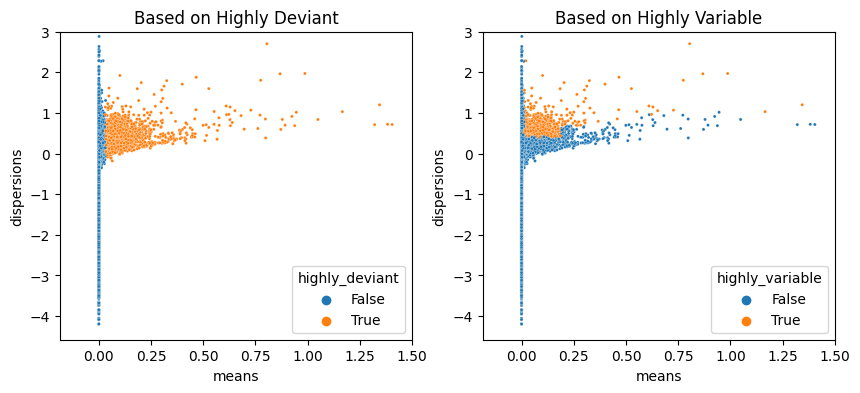

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

sns.scatterplot(
    data=mdata["gex"].var, x="means", y="dispersions", hue="highly_deviant", s=5,
    ax=axs[0]
)
axs[0].set_title("Based on Highly Deviant")
sns.scatterplot(
    data=mdata["gex"].var, x="means", y="dispersions", hue="highly_variable", s=5,
    ax=axs[1]
)
axs[1].set_title("Based on Highly Variable")
for ax in axs:
    ax.set_xlim(None, 1.5)
    ax.set_ylim(None, 3)

plt.show()

# Dimensionalty Reduction

## PCA

## Preprocessing steps before running PCA

In [11]:
# Choose parameter for highly_variable
highly_var = "highly_variable"

mdata["gex"].layers["raw"] = mdata["gex"].X.copy()
mdata["gex"].X = mdata["gex"].layers["log1p_norm"].copy()

mdata["gex"].var["highly_variable"] = mdata["gex"].var[highly_var]
adata_hv = mdata["gex"][: ,mdata["gex"].var[highly_var]].copy()

In [20]:
num_processors = psutil.cpu_count(logical=False)
sc.pp.regress_out(adata_hv, ["pct_counts_mt", "total_counts"])

#scales the data in the AnnData object so that each gene has a mean of zero and a standard deviation of one. 
# This standardization is a common preprocessing step, and it ensures that each gene has equal weight..
sc.pp.scale(
    adata_hv, 
    max_value=10 # caps the maximum value after scaling. This helps limit the impact of extreme outliers.
)

### Perform PCA

In [ ]:
# setting highly variable as highly deviant to use scanpy 'use_highly_variable' argument in sc.pp.pca
sc.tl.pca(adata_hv, svd_solver="arpack", n_comps=50, use_highly_variable=True)

In [ ]:
def plot_pc_rank(adata, n_pcs=20):
    plt.figure(figsize=(10, 3))

    log_var_ratio = np.log(adata.uns["pca"]["variance_ratio"])

    sns.scatterplot(log_var_ratio, s=30, edgecolor="black")
    plt.vlines(x=[i for i in range(len(log_var_ratio))], 
               ymin=min(log_var_ratio), 
               ymax=log_var_ratio, 
               color="grey", 
               zorder=-1,
               alpha=0.5
              )
    plt.vlines(x=n_pcs, color="r", ymin=min(log_var_ratio), ymax=max(log_var_ratio), linestyle="--")
    plt.ylabel("Log Variance Ratio")
    plt.xlabel("PC Rank")

In [ ]:
n_pcs=19 # Number of PCs for Donstream Clustering.
plot_pc_rank(adata_hv, n_pcs=n_pcs)

## UMAP

In [ ]:
np.random.seed(42)
fig, axs = plt.subplots(ncols=2, nrows=2)
axs = axs.flatten()

neighbors_itr = range(20, 60, 10)

for n, ax in zip(neighbors_itr, axs):
    sc.pp.neighbors(adata_hv, n_pcs=n_pcs, n_neighbors=n)
    umap_res = sc.tl.umap(adata_hv, copy=True)
    sc.pl.umap(umap_res, frameon=False, title=f"n_neighbors {n}", show=False, ax=ax)

fig.tight_layout()

In [ ]:
np.random.seed(42)
n_neighbors = 10
sc.pp.neighbors(adata_hv, n_pcs=n_pcs, n_neighbors=n_neighbors)
sc.tl.umap(adata_hv)

### Inspecting quality control metrics

In [ ]:
adata_hv.obs["exp_cell_l1"] = ["_".join(cell) if "Natural" in cell else cell[0] for cell in adata_hv.obs.Cell_Type_Experimental.str.split("_") ]

In [ ]:
sc.pl.umap(adata_hv, color=["exp_cell_l1", "total_count", "Sample_Tag", "doublet_score"], )

# Clustering

In [ ]:
# Defining a list of resolutions (determines the granularity of the clustering)
# Higher resolution ->  leads to a higher number of smaller clusters
resoltuions = [i/100 for i in range(25, 525, 100)]
np.random.seed(42)

fig, axs  = plt.subplots(ncols=3, nrows=2);
axs = axs.flatten()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Peforming leiden algorithm at each resolution in the list (we can use this lader to adjust based on annotations).
    for i, resolution in enumerate(resoltuions):
        sub_data = sc.tl.leiden(adata_hv, copy=True, resolution=resolution)
        _ = sc.pl.umap(
            sub_data,
            color="leiden",
            legend_loc="on data",
            ax=axs[i],
            show=False
        );
        axs[i].set_title(f"leiden {resolution}")
fig.tight_layout()